In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import svm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)#dropping the id column becoz it is not relevant for prediction, diagnosis is a label column, not numerical,unamed column too and axis=1 is used for columns 0 for rows
y = df['diagnosis']#what we have to predict
from sklearn.preprocessing import LabelEncoder
# Encode the target variable diagnosis to make it numerical
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
h=0.2 #mesh height
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
# Select only the first two features for training and plotting which is the mean_radius and mean_texture
X_2features = X.iloc[:, :2]
svc = svm.SVC(kernel='linear', C=C).fit(X_2features, y_encoded)#svc is the support vector classifier
rbf_svc = svm.SVC(kernel='rbf', gamma=0.9, C=C).fit(X_2features, y_encoded)
poly_svc = svm.SVC(kernel='poly', degree=1, C=C).fit(X_2features, y_encoded)#degrees must be in integer values
lin_svc = svm.LinearSVC(C=C).fit(X_2features, y_encoded)

In [ ]:
# create a mesh to plot in
X_np = X.values # Convert DataFrame to NumPy array
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [ ]:
# title for the plots
titles = ['SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


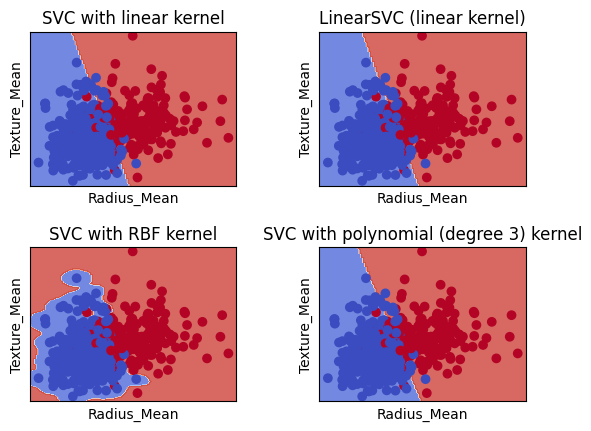

In [ ]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot the training points
    plt.scatter(X_2features.iloc[:, 0], X_2features.iloc[:, 1], c=y_encoded, cmap=plt.cm.coolwarm)
    plt.xlabel('Radius_Mean')
    plt.ylabel('Texture_Mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Assuming that the red points are the malignant tumor data points and the blue arethe benign data points, when we have gamma value as 0.3 and the degree as 5 the margin between the hyperplane as well as the support vectors is not maximised.I then increased the gamma and degree value but noticed that there was minimal to no change. I then decided to stop increasing the values and decrease them, the change was still minimal with my degree value of 1 and gamma value of 0.9, the support vector of the malignant tumor had a maximised margin from the hyperplane while the support vector of the benign tumor did not.